In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/LinkNet34.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = LinkNet34()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Tue Nov 26 12:06:44 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P8             17W /  340W |     583MiB /  16376MiB |      8%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


LinkNet34(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.3915093243122101
→ ACC for Batch 1: 0.04844856262207031
→ Recall for Batch 1: 0.9828586733327381
→ Running_loss for Batch 21: 0.39805153012275696
→ ACC for Batch 21: 0.9882946014404297
→ Recall for Batch 21: 0.0008348639171814994
→ Running_loss for Batch 41: 0.3720943331718445
→ ACC for Batch 41: 0.9624214172363281
→ Recall for Batch 41: 0.0
→ Running_loss for Batch 61: 0.324533075094223
→ ACC for Batch 61: 0.9680309295654297
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.31349390745162964
→ ACC for Batch 81: 0.9415035247802734
→ Recall for Batch 81: 0.2646722996117835
→ Running_loss for Batch 101: 0.3157060444355011
→ ACC for Batch 101: 0.9438629150390625
→ Recall for Batch 101: 0.2967525489476581
→ Running_loss for Batch 121: 0.301445335149765
→ ACC for Batch 121: 0.9801101684570312
→ Recall for Batch 121: 0.4820629695281506
→ Running_loss for Batch 141: 0.3782797157764435
→ ACC for Batch 141: 

  1%|          | 1/100 [08:33<14:07:05, 513.39s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.2496449500322342
→ ACC for Batch 1: 0.973846435546875
→ Recall for Batch 1: 0.5251199192123202
→ Running_loss for Batch 21: 0.18787482380867004
→ ACC for Batch 21: 0.9841537475585938
→ Recall for Batch 21: 0.7498605021921084
→ Running_loss for Batch 41: 0.1889721155166626
→ ACC for Batch 41: 0.9900302886962891
→ Recall for Batch 41: 0.6988394126006632
→ Running_loss for Batch 61: 0.20594759285449982
→ ACC for Batch 61: 0.989349365234375
→ Recall for Batch 61: 0.7047390841320553
→ Running_loss for Batch 81: 0.143326073884964
→ ACC for Batch 81: 0.9705562591552734
→ Recall for Batch 81: 0.7655383596788877
→ Running_loss for Batch 101: 0.16849233210086823
→ ACC for Batch 101: 0.9829235076904297
→ Recall for Batch 101: 0.7120415824429686
→ Running_loss for Batch 121: 0.1502409279346466
→ ACC for Batch 121: 0.9766597747802734
→ Recall for Batch 121: 0.8367589256469047
→ Running_loss for Batch 141: 0.149210497736

  2%|▏         | 2/100 [16:02<12:57:05, 475.77s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.16272424161434174
→ ACC for Batch 1: 0.9915847778320312
→ Recall for Batch 1: 0.7414880201765448
→ Running_loss for Batch 21: 0.1595064401626587
→ ACC for Batch 21: 0.9834957122802734
→ Recall for Batch 21: 0.7490606854150063
→ Running_loss for Batch 41: 0.20439669489860535
→ ACC for Batch 41: 0.9742546081542969
→ Recall for Batch 41: 0.6095420381868261
→ Running_loss for Batch 61: 0.17127418518066406
→ ACC for Batch 61: 0.9912185668945312
→ Recall for Batch 61: 0.7042655109489051
→ Running_loss for Batch 81: 0.21927602589130402
→ ACC for Batch 81: 0.9843196868896484
→ Recall for Batch 81: 0.7187104930467763
→ Running_loss for Batch 101: 0.12949855625629425
→ ACC for Batch 101: 0.9805870056152344
→ Recall for Batch 101: 0.9119241192411924
→ Running_loss for Batch 121: 0.1453522890806198
→ ACC for Batch 121: 0.9852676391601562
→ Recall for Batch 121: 0.8239150227617602
→ Running_loss for Batch 141: 0.1176258

  3%|▎         | 3/100 [23:53<12:45:36, 473.57s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.08860280364751816
→ ACC for Batch 1: 0.9916553497314453
→ Recall for Batch 1: 0.911253754195866
→ Running_loss for Batch 21: 0.16669142246246338
→ ACC for Batch 21: 0.9783782958984375
→ Recall for Batch 21: 0.7541776192264363
→ Running_loss for Batch 41: 0.1731938123703003
→ ACC for Batch 41: 0.9959621429443359
→ Recall for Batch 41: 0.7875706214689265
→ Running_loss for Batch 61: 0.1627207249403
→ ACC for Batch 61: 0.9801445007324219
→ Recall for Batch 61: 0.7666964818127608
→ Running_loss for Batch 81: 0.15807348489761353
→ ACC for Batch 81: 0.9807548522949219
→ Recall for Batch 81: 0.7434885931558936
→ Running_loss for Batch 101: 0.12244860082864761
→ ACC for Batch 101: 0.9877986907958984
→ Recall for Batch 101: 0.8438732884660014
→ Running_loss for Batch 121: 0.15733717381954193
→ ACC for Batch 121: 0.9925193786621094
→ Recall for Batch 121: 0.7537794299876084
→ Running_loss for Batch 141: 0.16198106110

  4%|▍         | 4/100 [29:58<11:29:16, 430.79s/it]

Validation loss for Epoch 4: 0.1797010600566864

Acurácia de validação:  0.9838277612413678
F1-score de validação:  0.6796564966373401
IoU de validação:  0.9722833399380403
Recall de validação:  0.7220916846087836

---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.13750864565372467
→ ACC for Batch 1: 0.9900989532470703
→ Recall for Batch 1: 0.7780472539508684
→ Running_loss for Batch 21: 0.11009731143712997
→ ACC for Batch 21: 0.9853305816650391
→ Recall for Batch 21: 0.8581766166014557
→ Running_loss for Batch 41: 0.1781598925590515
→ ACC for Batch 41: 0.9896106719970703
→ Recall for Batch 41: 0.686586717726494
→ Running_loss for Batch 61: 0.13116221129894257
→ ACC for Batch 61: 0.9801216125488281
→ Recall for Batch 61: 0.7868780434225461
→ Running_loss for Batch 81: 0.141668900847435
→ ACC for Batch 81: 0.9830131530761719
→ Recall for Batch 81: 0.8417644059153493
→ Running_loss for Batch 101: 0.10338558256626129
→ ACC for Batch 101: 0.9872169494628906
→ R

  5%|▌         | 5/100 [35:44<10:33:27, 400.08s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.1480799913406372
→ ACC for Batch 1: 0.9913501739501953
→ Recall for Batch 1: 0.6855980184005662
→ Running_loss for Batch 21: 0.15037503838539124
→ ACC for Batch 21: 0.9903411865234375
→ Recall for Batch 21: 0.8037241117233517
→ Running_loss for Batch 41: 0.12495597451925278
→ ACC for Batch 41: 0.9921932220458984
→ Recall for Batch 41: 0.8082142857142857
→ Running_loss for Batch 61: 0.13121441006660461
→ ACC for Batch 61: 0.991363525390625
→ Recall for Batch 61: 0.8102501525320317
→ Running_loss for Batch 81: 0.1391994059085846
→ ACC for Batch 81: 0.9837646484375
→ Recall for Batch 81: 0.7281017737449272
→ Running_loss for Batch 101: 0.18933267891407013
→ ACC for Batch 101: 0.9943103790283203
→ Recall for Batch 101: 0.608140171564154
→ Running_loss for Batch 121: 0.18498265743255615
→ ACC for Batch 121: 0.9937973022460938
→ Recall for Batch 121: 0.7594254937163375
→ Running_loss for Batch 141: 0.171785011887

  6%|▌         | 6/100 [41:38<10:01:56, 384.22s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.1187739223241806
→ ACC for Batch 1: 0.9916858673095703
→ Recall for Batch 1: 0.8334676769305175
→ Running_loss for Batch 21: 0.1642514020204544
→ ACC for Batch 21: 0.9867591857910156
→ Recall for Batch 21: 0.7198216981810338
→ Running_loss for Batch 41: 0.1104220449924469
→ ACC for Batch 41: 0.9923629760742188
→ Recall for Batch 41: 0.9230365576351233
→ Running_loss for Batch 61: 0.1655144840478897
→ ACC for Batch 61: 0.9782924652099609
→ Recall for Batch 61: 0.8366367222776748
→ Running_loss for Batch 81: 0.141294926404953
→ ACC for Batch 81: 0.9982013702392578
→ Recall for Batch 81: 0.78809738503156
→ Running_loss for Batch 101: 0.11298636347055435
→ ACC for Batch 101: 0.9917030334472656
→ Recall for Batch 101: 0.811402224824356
→ Running_loss for Batch 121: 0.10798855125904083
→ ACC for Batch 121: 0.9934902191162109
→ Recall for Batch 121: 0.8414678564924422
→ Running_loss for Batch 141: 0.09368056803941

  7%|▋         | 7/100 [48:11<9:59:59, 387.09s/it] 

Validation loss for Epoch 7: 0.1460460126399994

Acurácia de validação:  0.9858858196102843
F1-score de validação:  0.7151897460507394
IoU de validação:  0.975313049812559
Recall de validação:  0.7379709948493816

---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.15318961441516876
→ ACC for Batch 1: 0.9960556030273438
→ Recall for Batch 1: 0.7492177022798391
→ Running_loss for Batch 21: 0.08815866708755493
→ ACC for Batch 21: 0.9944324493408203
→ Recall for Batch 21: 0.8565167052596758
→ Running_loss for Batch 41: 0.1134980171918869
→ ACC for Batch 41: 0.9856414794921875
→ Recall for Batch 41: 0.8539190813192683
→ Running_loss for Batch 61: 0.10358478128910065
→ ACC for Batch 61: 0.9891853332519531
→ Recall for Batch 61: 0.8854768201198122
→ Running_loss for Batch 81: 0.12514418363571167
→ ACC for Batch 81: 0.9921169281005859
→ Recall for Batch 81: 0.872342453999428
→ Running_loss for Batch 101: 0.11779361218214035
→ ACC for Batch 101: 0.9874286651611328
→ 

  8%|▊         | 8/100 [54:58<10:03:32, 393.61s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.08289635181427002
→ ACC for Batch 1: 0.9934463500976562
→ Recall for Batch 1: 0.88713485799096
→ Running_loss for Batch 21: 0.0998995453119278
→ ACC for Batch 21: 0.9953441619873047
→ Recall for Batch 21: 0.8646598996616498
→ Running_loss for Batch 41: 0.11297262459993362
→ ACC for Batch 41: 0.9963474273681641
→ Recall for Batch 41: 0.8441491197790818
→ Running_loss for Batch 61: 0.10388381034135818
→ ACC for Batch 61: 0.9926586151123047
→ Recall for Batch 61: 0.8657411059398912
→ Running_loss for Batch 81: 0.11001631617546082
→ ACC for Batch 81: 0.9938316345214844
→ Recall for Batch 81: 0.8610108303249098
→ Running_loss for Batch 101: 0.1001022607088089
→ ACC for Batch 101: 0.9874706268310547
→ Recall for Batch 101: 0.9004289907428313
→ Running_loss for Batch 121: 0.11205227673053741
→ ACC for Batch 121: 0.9931507110595703
→ Recall for Batch 121: 0.8468096809680968
→ Running_loss for Batch 141: 0.136130169

  9%|▉         | 9/100 [1:02:25<10:22:04, 410.16s/it]

Validation loss for Epoch 9: 0.1429729461669922

Acurácia de validação:  0.9867335349794418
F1-score de validação:  0.7315096729734718
IoU de validação:  0.9766354107555539
Recall de validação:  0.7507803902191483

---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.1210864782333374
→ ACC for Batch 1: 0.9968643188476562
→ Recall for Batch 1: 0.7855366763365106
→ Running_loss for Batch 21: 0.13161307573318481
→ ACC for Batch 21: 0.9828205108642578
→ Recall for Batch 21: 0.8018566493955095
→ Running_loss for Batch 41: 0.12784823775291443
→ ACC for Batch 41: 0.990997314453125
→ Recall for Batch 41: 0.8090327737809753
→ Running_loss for Batch 61: 0.07666877657175064
→ ACC for Batch 61: 0.9940891265869141
→ Recall for Batch 61: 0.9072792693052865
→ Running_loss for Batch 81: 0.08861586451530457
→ ACC for Batch 81: 0.9940204620361328
→ Recall for Batch 81: 0.8793610426766272
→ Running_loss for Batch 101: 0.13273732364177704
→ ACC for Batch 101: 0.9983482360839844


 10%|█         | 10/100 [1:10:21<10:45:42, 430.48s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.12991894781589508
→ ACC for Batch 1: 0.9814701080322266
→ Recall for Batch 1: 0.8618819524167689
→ Running_loss for Batch 21: 0.11070694029331207
→ ACC for Batch 21: 0.9926013946533203
→ Recall for Batch 21: 0.8322596428280192
→ Running_loss for Batch 41: 0.13203349709510803
→ ACC for Batch 41: 0.9953708648681641
→ Recall for Batch 41: 0.7783766645529486
→ Running_loss for Batch 61: 0.10504523664712906
→ ACC for Batch 61: 0.9954128265380859
→ Recall for Batch 61: 0.8545636910732196
→ Running_loss for Batch 81: 0.10657934099435806
→ ACC for Batch 81: 0.9933853149414062
→ Recall for Batch 81: 0.8283187375357669
→ Running_loss for Batch 101: 0.0994403287768364
→ ACC for Batch 101: 0.9898452758789062
→ Recall for Batch 101: 0.8479067579574557
→ Running_loss for Batch 121: 0.10976054519414902
→ ACC for Batch 121: 0.9898242950439453
→ Recall for Batch 121: 0.8028033140392691
→ Running_loss for Batch 141: 0.09017

 11%|█         | 11/100 [1:17:43<10:43:42, 433.96s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.09541551023721695
→ ACC for Batch 1: 0.9856491088867188
→ Recall for Batch 1: 0.873792009231213
→ Running_loss for Batch 21: 0.11215879768133163
→ ACC for Batch 21: 0.9947414398193359
→ Recall for Batch 21: 0.843679525222552
→ Running_loss for Batch 41: 0.13135436177253723
→ ACC for Batch 41: 0.9929084777832031
→ Recall for Batch 41: 0.7924058512293807
→ Running_loss for Batch 61: 0.11547929793596268
→ ACC for Batch 61: 0.9933357238769531
→ Recall for Batch 61: 0.7890832493818115
→ Running_loss for Batch 81: 0.07607261836528778
→ ACC for Batch 81: 0.9897441864013672
→ Recall for Batch 81: 0.9138755980861244
→ Running_loss for Batch 101: 0.11685761064291
→ ACC for Batch 101: 0.9968166351318359
→ Recall for Batch 101: 0.7985015772870663
→ Running_loss for Batch 121: 0.06347871571779251
→ ACC for Batch 121: 0.9959068298339844
→ Recall for Batch 121: 0.9268825910931174
→ Running_loss for Batch 141: 0.100375302

 12%|█▏        | 12/100 [1:24:47<10:32:20, 431.15s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.07262743264436722
→ ACC for Batch 1: 0.99456787109375
→ Recall for Batch 1: 0.8957738633990113
→ Running_loss for Batch 21: 0.11437249928712845
→ ACC for Batch 21: 0.9866600036621094
→ Recall for Batch 21: 0.8387692307692308
→ Running_loss for Batch 41: 0.12108311802148819
→ ACC for Batch 41: 0.9933490753173828
→ Recall for Batch 41: 0.8205678104575164
→ Running_loss for Batch 61: 0.10827796161174774
→ ACC for Batch 61: 0.98876953125
→ Recall for Batch 61: 0.8574489741254621
→ Running_loss for Batch 81: 0.09199482947587967
→ ACC for Batch 81: 0.9908580780029297
→ Recall for Batch 81: 0.8960004425513083
→ Running_loss for Batch 101: 0.12548108398914337
→ ACC for Batch 101: 0.9835262298583984
→ Recall for Batch 101: 0.8744762414192743
→ Running_loss for Batch 121: 0.08101855218410492
→ ACC for Batch 121: 0.9946727752685547
→ Recall for Batch 121: 0.8891038039974211
→ Running_loss for Batch 141: 0.10011357069

 13%|█▎        | 13/100 [1:30:59<9:58:55, 413.06s/it] 


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.0896538719534874
→ ACC for Batch 1: 0.9928016662597656
→ Recall for Batch 1: 0.8789505468697578
→ Running_loss for Batch 21: 0.08719626069068909
→ ACC for Batch 21: 0.9939422607421875
→ Recall for Batch 21: 0.9194598504943332
→ Running_loss for Batch 41: 0.09902980178594589
→ ACC for Batch 41: 0.9909877777099609
→ Recall for Batch 41: 0.8724625422909618
→ Running_loss for Batch 61: 0.09564661979675293
→ ACC for Batch 61: 0.9946994781494141
→ Recall for Batch 61: 0.86884765625
→ Running_loss for Batch 81: 0.08004117757081985
→ ACC for Batch 81: 0.9945774078369141
→ Recall for Batch 81: 0.9228907888369092
→ Running_loss for Batch 101: 0.11472281813621521
→ ACC for Batch 101: 0.9951190948486328
→ Recall for Batch 101: 0.8385150203332021
→ Running_loss for Batch 121: 0.1257043033838272
→ ACC for Batch 121: 0.9943885803222656
→ Recall for Batch 121: 0.8172479391249208
→ Running_loss for Batch 141: 0.14551779627

 14%|█▍        | 14/100 [1:38:29<10:08:19, 424.41s/it]

Validation loss for Epoch 14: 0.1233062744140625

Acurácia de validação:  0.9882418829567579
F1-score de validação:  0.7623027419576287
IoU de validação:  0.9790603279820207
Recall de validação:  0.7788410327317544

---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.12565886974334717
→ ACC for Batch 1: 0.9929409027099609
→ Recall for Batch 1: 0.8426558939299772
→ Running_loss for Batch 21: 0.08577495068311691
→ ACC for Batch 21: 0.9848861694335938
→ Recall for Batch 21: 0.8904968060306985
→ Running_loss for Batch 41: 0.1278168112039566
→ ACC for Batch 41: 0.9968357086181641
→ Recall for Batch 41: 0.8350247816851546
→ Running_loss for Batch 61: 0.08133257180452347
→ ACC for Batch 61: 0.9951038360595703
→ Recall for Batch 61: 0.9151680290644868
→ Running_loss for Batch 81: 0.09418162703514099
→ ACC for Batch 81: 0.9984607696533203
→ Recall for Batch 81: 0.8634734441186054
→ Running_loss for Batch 101: 0.08701823651790619
→ ACC for Batch 101: 0.992654800415039

 15%|█▌        | 15/100 [1:46:31<10:25:49, 441.76s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.10722997784614563
→ ACC for Batch 1: 0.9881496429443359
→ Recall for Batch 1: 0.8936674917491749
→ Running_loss for Batch 21: 0.09454741328954697
→ ACC for Batch 21: 0.9917736053466797
→ Recall for Batch 21: 0.8857777777777778
→ Running_loss for Batch 41: 0.08600429445505142
→ ACC for Batch 41: 0.9909744262695312
→ Recall for Batch 41: 0.8928735867396531
→ Running_loss for Batch 61: 0.08018699288368225
→ ACC for Batch 61: 0.9938869476318359
→ Recall for Batch 61: 0.9026019690576652
→ Running_loss for Batch 81: 0.10559824109077454
→ ACC for Batch 81: 0.991546630859375
→ Recall for Batch 81: 0.8724794491674278
→ Running_loss for Batch 101: 0.11508409678936005
→ ACC for Batch 101: 0.9833126068115234
→ Recall for Batch 101: 0.8437832497340021
→ Running_loss for Batch 121: 0.10606959462165833
→ ACC for Batch 121: 0.9938945770263672
→ Recall for Batch 121: 0.8232248520710059
→ Running_loss for Batch 141: 0.12199

 16%|█▌        | 16/100 [1:52:42<9:48:44, 420.53s/it] 


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.112236887216568
→ ACC for Batch 1: 0.99212646484375
→ Recall for Batch 1: 0.8893247642099992
→ Running_loss for Batch 21: 0.07118497788906097
→ ACC for Batch 21: 0.9889678955078125
→ Recall for Batch 21: 0.9033750041894293
→ Running_loss for Batch 41: 0.08646775782108307
→ ACC for Batch 41: 0.9914817810058594
→ Recall for Batch 41: 0.8710283383426364
→ Running_loss for Batch 61: 0.11488725990056992
→ ACC for Batch 61: 0.9990558624267578
→ Recall for Batch 61: 0.836076817558299
→ Running_loss for Batch 81: 0.09388144314289093
→ ACC for Batch 81: 0.99359130859375
→ Recall for Batch 81: 0.8830418738969998
→ Running_loss for Batch 101: 0.12376758456230164
→ ACC for Batch 101: 0.9986763000488281
→ Recall for Batch 101: 0.8339602364320258
→ Running_loss for Batch 121: 0.09658250212669373
→ ACC for Batch 121: 0.9961318969726562
→ Recall for Batch 121: 0.908122692416927
→ Running_loss for Batch 141: 0.074123330414

 17%|█▋        | 17/100 [2:01:08<10:16:57, 445.99s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.10659924149513245
→ ACC for Batch 1: 0.9800186157226562
→ Recall for Batch 1: 0.8495214362575749
→ Running_loss for Batch 21: 0.07802698016166687
→ ACC for Batch 21: 0.9952869415283203
→ Recall for Batch 21: 0.9052594297857269
→ Running_loss for Batch 41: 0.12108548730611801
→ ACC for Batch 41: 0.9970455169677734
→ Recall for Batch 41: 0.7861842105263158
→ Running_loss for Batch 61: 0.07923031598329544
→ ACC for Batch 61: 0.9960479736328125
→ Recall for Batch 61: 0.9069392146315223
→ Running_loss for Batch 81: 0.0820288211107254
→ ACC for Batch 81: 0.9960594177246094
→ Recall for Batch 81: 0.8805189142047313
→ Running_loss for Batch 101: 0.08357008546590805
→ ACC for Batch 101: 0.9907150268554688
→ Recall for Batch 101: 0.9291299367498381
→ Running_loss for Batch 121: 0.09013083577156067
→ ACC for Batch 121: 0.9955406188964844
→ Recall for Batch 121: 0.8959627329192547
→ Running_loss for Batch 141: 0.08233

 18%|█▊        | 18/100 [2:08:36<10:10:25, 446.65s/it]

Validation loss for Epoch 18: 0.11378520727157593

Acurácia de validação:  0.9890065968982757
F1-score de validação:  0.778021666610654
IoU de validação:  0.9803083439452961
Recall de validação:  0.7940749005975839

---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.09991565346717834
→ ACC for Batch 1: 0.9925098419189453
→ Recall for Batch 1: 0.8811536180308422
→ Running_loss for Batch 21: 0.07159018516540527
→ ACC for Batch 21: 0.9944591522216797
→ Recall for Batch 21: 0.9196903725205612
→ Running_loss for Batch 41: 0.06345528364181519
→ ACC for Batch 41: 0.9959869384765625
→ Recall for Batch 41: 0.9227231666256056
→ Running_loss for Batch 61: 0.08974368125200272
→ ACC for Batch 61: 0.9952239990234375
→ Recall for Batch 61: 0.923980354473628
→ Running_loss for Batch 81: 0.07777872681617737
→ ACC for Batch 81: 0.9981231689453125
→ Recall for Batch 81: 0.9209583519928347
→ Running_loss for Batch 101: 0.09688759595155716
→ ACC for Batch 101: 0.990812301635742

 19%|█▉        | 19/100 [2:14:27<9:24:20, 418.04s/it] 

Validation loss for Epoch 19: 0.11406303942203522

Acurácia de validação:  0.9891604982820669
F1-score de validação:  0.7809662235401222
IoU de validação:  0.9805587748514648
Recall de validação:  0.7965343359664571

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.08335129916667938
→ ACC for Batch 1: 0.9971942901611328
→ Recall for Batch 1: 0.8831127914303718
→ Running_loss for Batch 21: 0.10658998787403107
→ ACC for Batch 21: 0.9970626831054688
→ Recall for Batch 21: 0.8726153846153846
→ Running_loss for Batch 41: 0.12033751606941223
→ ACC for Batch 41: 0.9925518035888672
→ Recall for Batch 41: 0.864044625129999
→ Running_loss for Batch 61: 0.07983797788619995
→ ACC for Batch 61: 0.9939689636230469
→ Recall for Batch 61: 0.8836547800749271
→ Running_loss for Batch 81: 0.07956919819116592
→ ACC for Batch 81: 0.9990959167480469
→ Recall for Batch 81: 0.9142992424242424
→ Running_loss for Batch 101: 0.0797930657863617
→ ACC for Batch 101: 0.992774963378906

 20%|██        | 20/100 [2:20:11<8:47:49, 395.87s/it]


---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.07273782044649124
→ ACC for Batch 1: 0.9864501953125
→ Recall for Batch 1: 0.8974337540750648
→ Running_loss for Batch 21: 0.059361156076192856
→ ACC for Batch 21: 0.9928703308105469
→ Recall for Batch 21: 0.9125608981148062
→ Running_loss for Batch 41: 0.09018804132938385
→ ACC for Batch 41: 0.9942398071289062
→ Recall for Batch 41: 0.8673867885334441
→ Running_loss for Batch 61: 0.09950974583625793
→ ACC for Batch 61: 0.9974899291992188
→ Recall for Batch 61: 0.8897795591182365
→ Running_loss for Batch 81: 0.10706295818090439
→ ACC for Batch 81: 0.9986076354980469
→ Recall for Batch 81: 0.8814977973568282
→ Running_loss for Batch 101: 0.10359948873519897
→ ACC for Batch 101: 0.9933948516845703
→ Recall for Batch 101: 0.8988632262721039
→ Running_loss for Batch 121: 0.11181401461362839
→ ACC for Batch 121: 0.9910793304443359
→ Recall for Batch 121: 0.8409705372616985
→ Running_loss for Batch 141: 0.117377

 21%|██        | 21/100 [2:26:05<8:24:19, 383.04s/it]

Validation loss for Epoch 21: 0.11135733872652054

Acurácia de validação:  0.9894284569487279
F1-score de validação:  0.786560091352017
IoU de validação:  0.98099657730104
Recall de validação:  0.8017949242221672

---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.17537179589271545
→ ACC for Batch 1: 0.9864883422851562
→ Recall for Batch 1: 0.6654086224415735
→ Running_loss for Batch 21: 0.09639716893434525
→ ACC for Batch 21: 0.9937896728515625
→ Recall for Batch 21: 0.886815275617764
→ Running_loss for Batch 41: 0.12549710273742676
→ ACC for Batch 41: 0.9971809387207031
→ Recall for Batch 41: 0.8037801541904999
→ Running_loss for Batch 61: 0.06933222711086273
→ ACC for Batch 61: 0.9947452545166016
→ Recall for Batch 61: 0.914380714879468
→ Running_loss for Batch 81: 0.07892417162656784
→ ACC for Batch 81: 0.9947605133056641
→ Recall for Batch 81: 0.9276391871799108
→ Running_loss for Batch 101: 0.07646868377923965
→ ACC for Batch 101: 0.9953365325927734
→

 22%|██▏       | 22/100 [2:32:54<8:28:11, 390.91s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.09102611243724823
→ ACC for Batch 1: 0.9963665008544922
→ Recall for Batch 1: 0.8602179112410311
→ Running_loss for Batch 21: 0.09030583500862122
→ ACC for Batch 21: 0.9908504486083984
→ Recall for Batch 21: 0.8866216795201372
→ Running_loss for Batch 41: 0.07847912609577179
→ ACC for Batch 41: 0.9916610717773438
→ Recall for Batch 41: 0.893214958833449
→ Running_loss for Batch 61: 0.11543649435043335
→ ACC for Batch 61: 0.9841079711914062
→ Recall for Batch 61: 0.8452043302840251
→ Running_loss for Batch 81: 0.08083274960517883
→ ACC for Batch 81: 0.9942646026611328
→ Recall for Batch 81: 0.8867854214802117
→ Running_loss for Batch 101: 0.08351749926805496
→ ACC for Batch 101: 0.9793777465820312
→ Recall for Batch 101: 0.8821125626896168
→ Running_loss for Batch 121: 0.09816108644008636
→ ACC for Batch 121: 0.9921989440917969
→ Recall for Batch 121: 0.8742655699177438
→ Running_loss for Batch 141: 0.07013

 23%|██▎       | 23/100 [2:40:46<8:53:04, 415.38s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.11836939305067062
→ ACC for Batch 1: 0.9921970367431641
→ Recall for Batch 1: 0.8088247491084017
→ Running_loss for Batch 21: 0.0829632580280304
→ ACC for Batch 21: 0.9952487945556641
→ Recall for Batch 21: 0.8948106591865358
→ Running_loss for Batch 41: 0.07834148406982422
→ ACC for Batch 41: 0.9923954010009766
→ Recall for Batch 41: 0.8826346660926654
→ Running_loss for Batch 61: 0.0720820426940918
→ ACC for Batch 61: 0.9894733428955078
→ Recall for Batch 61: 0.9067976537478859
→ Running_loss for Batch 81: 0.10085590928792953
→ ACC for Batch 81: 0.9949855804443359
→ Recall for Batch 81: 0.8764917811303761
→ Running_loss for Batch 101: 0.08776312321424484
→ ACC for Batch 101: 0.997955322265625
→ Recall for Batch 101: 0.8973392983282317
→ Running_loss for Batch 121: 0.1450895071029663
→ ACC for Batch 121: 0.9996585845947266
→ Recall for Batch 121: 0.8233766233766234
→ Running_loss for Batch 141: 0.08507531

 24%|██▍       | 24/100 [2:48:11<8:57:17, 424.18s/it]

Validation loss for Epoch 24: 0.11117927730083466

Acurácia de validação:  0.9897649061112177
F1-score de validação:  0.793400121308298
IoU de validação:  0.9815444318736468
Recall de validação:  0.8075840232708358

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.07977569848299026
→ ACC for Batch 1: 0.9925251007080078
→ Recall for Batch 1: 0.8912393524002933
→ Running_loss for Batch 21: 0.0794023647904396
→ ACC for Batch 21: 0.9948310852050781
→ Recall for Batch 21: 0.889967637540453
→ Running_loss for Batch 41: 0.07885076105594635
→ ACC for Batch 41: 0.9922695159912109
→ Recall for Batch 41: 0.8923999351806838
→ Running_loss for Batch 61: 0.0901944488286972
→ ACC for Batch 61: 0.9980220794677734
→ Recall for Batch 61: 0.8684978123480798
→ Running_loss for Batch 81: 0.092903271317482
→ ACC for Batch 81: 0.9989719390869141
→ Recall for Batch 81: 0.9116135662898253
→ Running_loss for Batch 101: 0.10721207410097122
→ ACC for Batch 101: 0.9874000549316406
→ 

 25%|██▌       | 25/100 [2:54:19<8:29:06, 407.28s/it]

Validation loss for Epoch 25: 0.1095932126045227

Acurácia de validação:  0.9898619638170515
F1-score de validação:  0.7953132036206912
IoU de validação:  0.9817027109207868
Recall de validação:  0.8092426232332298

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.06931691616773605
→ ACC for Batch 1: 0.9953212738037109
→ Recall for Batch 1: 0.8977603926982666
→ Running_loss for Batch 21: 0.08404015749692917
→ ACC for Batch 21: 0.9947032928466797
→ Recall for Batch 21: 0.8837346354605152
→ Running_loss for Batch 41: 0.09216814488172531
→ ACC for Batch 41: 0.9956169128417969
→ Recall for Batch 41: 0.8519468927814348
→ Running_loss for Batch 61: 0.10210152715444565
→ ACC for Batch 61: 0.9989528656005859
→ Recall for Batch 61: 0.8715596330275229
→ Running_loss for Batch 81: 0.0728377252817154
→ ACC for Batch 81: 0.9939556121826172
→ Recall for Batch 81: 0.900100781053162
→ Running_loss for Batch 101: 0.07739807665348053
→ ACC for Batch 101: 0.9944629669189453

 26%|██▌       | 26/100 [3:01:52<8:39:15, 421.02s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.12680894136428833
→ ACC for Batch 1: 0.9972629547119141
→ Recall for Batch 1: 0.8051441932969603
→ Running_loss for Batch 21: 0.0811234712600708
→ ACC for Batch 21: 0.9956436157226562
→ Recall for Batch 21: 0.8976762740600379
→ Running_loss for Batch 41: 0.07012500613927841
→ ACC for Batch 41: 0.9966583251953125
→ Recall for Batch 41: 0.8977705274605764
→ Running_loss for Batch 61: 0.09485618770122528
→ ACC for Batch 61: 0.9960536956787109
→ Recall for Batch 61: 0.8733550488599349
→ Running_loss for Batch 81: 0.10962671786546707
→ ACC for Batch 81: 0.9951858520507812
→ Recall for Batch 81: 0.8384741281631626
→ Running_loss for Batch 101: 0.08371293544769287
→ ACC for Batch 101: 0.9992923736572266
→ Recall for Batch 101: 0.9232786885245902
→ Running_loss for Batch 121: 0.08762963861227036
→ ACC for Batch 121: 0.9929046630859375
→ Recall for Batch 121: 0.8807745687661093
→ Running_loss for Batch 141: 0.08335

 27%|██▋       | 27/100 [3:09:31<8:46:07, 432.43s/it]


---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.0874549150466919
→ ACC for Batch 1: 0.9930610656738281
→ Recall for Batch 1: 0.8974130240856378
→ Running_loss for Batch 21: 0.08879885077476501
→ ACC for Batch 21: 0.9900894165039062
→ Recall for Batch 21: 0.8813307090394125
→ Running_loss for Batch 41: 0.07320508360862732
→ ACC for Batch 41: 0.9926528930664062
→ Recall for Batch 41: 0.9101900739176346
→ Running_loss for Batch 61: 0.10589876025915146
→ ACC for Batch 61: 0.9958381652832031
→ Recall for Batch 61: 0.8573856394278431
→ Running_loss for Batch 81: 0.07340827584266663
→ ACC for Batch 81: 0.9894142150878906
→ Recall for Batch 81: 0.9235765157385881
→ Running_loss for Batch 101: 0.07205607742071152
→ ACC for Batch 101: 0.9939212799072266
→ Recall for Batch 101: 0.9077037588388538
→ Running_loss for Batch 121: 0.0813961923122406
→ ACC for Batch 121: 0.9981803894042969
→ Recall for Batch 121: 0.8689703153988868
→ Running_loss for Batch 141: 0.112893

 28%|██▊       | 28/100 [3:16:25<8:32:08, 426.79s/it]


---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.12167640775442123
→ ACC for Batch 1: 0.9981803894042969
→ Recall for Batch 1: 0.7948811700182815
→ Running_loss for Batch 21: 0.07196017354726791
→ ACC for Batch 21: 0.9933586120605469
→ Recall for Batch 21: 0.9103499373076485
→ Running_loss for Batch 41: 0.05556938424706459
→ ACC for Batch 41: 0.9958305358886719
→ Recall for Batch 41: 0.9387867901063977
→ Running_loss for Batch 61: 0.06547868251800537
→ ACC for Batch 61: 0.9935684204101562
→ Recall for Batch 61: 0.9215320690389942
→ Running_loss for Batch 81: 0.07395754009485245
→ ACC for Batch 81: 0.9922046661376953
→ Recall for Batch 81: 0.9087028574298197
→ Running_loss for Batch 101: 0.07519850879907608
→ ACC for Batch 101: 0.9963798522949219
→ Recall for Batch 101: 0.9011169513797634
→ Running_loss for Batch 121: 0.08144930005073547
→ ACC for Batch 121: 0.9943447113037109
→ Recall for Batch 121: 0.9065573770491804
→ Running_loss for Batch 141: 0.0843

 29%|██▉       | 29/100 [3:23:13<8:18:22, 421.16s/it]

Validation loss for Epoch 29: 0.11074644327163696

Acurácia de validação:  0.9901820033641872
F1-score de validação:  0.8019240835287569
IoU de validação:  0.9822262564484552
Recall de validação:  0.8152119383837189

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.08128003031015396
→ ACC for Batch 1: 0.9917869567871094
→ Recall for Batch 1: 0.8854738382729601
→ Running_loss for Batch 21: 0.06906220316886902
→ ACC for Batch 21: 0.9981422424316406
→ Recall for Batch 21: 0.9284578696343402
→ Running_loss for Batch 41: 0.0810445249080658
→ ACC for Batch 41: 0.9982280731201172
→ Recall for Batch 41: 0.8635189100305379
→ Running_loss for Batch 61: 0.04850802570581436
→ ACC for Batch 61: 0.9970531463623047
→ Recall for Batch 61: 0.9250472046629997
→ Running_loss for Batch 81: 0.09496530890464783
→ ACC for Batch 81: 0.9888534545898438
→ Recall for Batch 81: 0.8672497481454345
→ Running_loss for Batch 101: 0.08465273678302765
→ ACC for Batch 101: 0.99191665649414

 30%|███       | 30/100 [3:31:15<8:32:44, 439.49s/it]

Validation loss for Epoch 30: 0.10768391191959381

Acurácia de validação:  0.9902484939211891
F1-score de validação:  0.8033641023207195
IoU de validação:  0.9823369498792108
Recall de validação:  0.816819641666091

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.06898177415132523
→ ACC for Batch 1: 0.9920749664306641
→ Recall for Batch 1: 0.9062655058865984
→ Running_loss for Batch 21: 0.08479825407266617
→ ACC for Batch 21: 0.9949169158935547
→ Recall for Batch 21: 0.9050095811661648
→ Running_loss for Batch 41: 0.0922575443983078
→ ACC for Batch 41: 0.9951000213623047
→ Recall for Batch 41: 0.8790355537392726
→ Running_loss for Batch 61: 0.104788638651371
→ ACC for Batch 61: 0.9962825775146484
→ Recall for Batch 61: 0.8552651925158496
→ Running_loss for Batch 81: 0.10549379885196686
→ ACC for Batch 81: 0.9882125854492188
→ Recall for Batch 81: 0.8450186287317947
→ Running_loss for Batch 101: 0.09121367335319519
→ ACC for Batch 101: 0.9939193725585938


 31%|███       | 31/100 [3:38:12<8:17:49, 432.89s/it]

Validation loss for Epoch 31: 0.10801202058792114

Acurácia de validação:  0.9903131712416899
F1-score de validação:  0.8046901376352719
IoU de validação:  0.9824434774226433
Recall de validação:  0.8180065128255207

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.059330474585294724
→ ACC for Batch 1: 0.990631103515625
→ Recall for Batch 1: 0.9262487757100881
→ Running_loss for Batch 21: 0.15578952431678772
→ ACC for Batch 21: 0.9830570220947266
→ Recall for Batch 21: 0.7255696202531645
→ Running_loss for Batch 41: 0.07491381466388702
→ ACC for Batch 41: 0.9871711730957031
→ Recall for Batch 41: 0.8820322329399077
→ Running_loss for Batch 61: 0.10450996458530426
→ ACC for Batch 61: 0.9952888488769531
→ Recall for Batch 61: 0.8501703992210321
→ Running_loss for Batch 81: 0.0932471826672554
→ ACC for Batch 81: 0.9943656921386719
→ Recall for Batch 81: 0.8866775717920756
→ Running_loss for Batch 101: 0.079838827252388
→ ACC for Batch 101: 0.9925765991210938

 32%|███▏      | 32/100 [3:45:16<8:07:20, 430.00s/it]

Validation loss for Epoch 32: 0.10767744481563568

Acurácia de validação:  0.9903738195342677
F1-score de validação:  0.8059146603195176
IoU de validação:  0.9825429990502377
Recall de validação:  0.819153963770727

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.08563428372144699
→ ACC for Batch 1: 0.99688720703125
→ Recall for Batch 1: 0.8722053944901197
→ Running_loss for Batch 21: 0.09993885457515717
→ ACC for Batch 21: 0.9886856079101562
→ Recall for Batch 21: 0.8676030504874988
→ Running_loss for Batch 41: 0.07498817145824432
→ ACC for Batch 41: 0.99627685546875
→ Recall for Batch 41: 0.9120465066207342
→ Running_loss for Batch 61: 0.06117865815758705
→ ACC for Batch 61: 0.9926586151123047
→ Recall for Batch 61: 0.9160806174957118
→ Running_loss for Batch 81: 0.10138679295778275
→ ACC for Batch 81: 0.9988574981689453
→ Recall for Batch 81: 0.9032258064516129
→ Running_loss for Batch 101: 0.07785675674676895
→ ACC for Batch 101: 0.9955120086669922
→

 33%|███▎      | 33/100 [3:50:50<7:28:06, 401.30s/it]


---------Training for Epoch 34 starting:---------
→ Running_loss for Batch 1: 0.07974173128604889
→ ACC for Batch 1: 0.9893112182617188
→ Recall for Batch 1: 0.9129547364629608
→ Running_loss for Batch 21: 0.11405187100172043
→ ACC for Batch 21: 0.9994716644287109
→ Recall for Batch 21: 0.82953181272509
→ Running_loss for Batch 41: 0.07644084841012955
→ ACC for Batch 41: 0.9917278289794922
→ Recall for Batch 41: 0.889671135114283
→ Running_loss for Batch 61: 0.058738842606544495
→ ACC for Batch 61: 0.9952850341796875
→ Recall for Batch 61: 0.9274848523913884
→ Running_loss for Batch 81: 0.08949366211891174
→ ACC for Batch 81: 0.9898014068603516
→ Recall for Batch 81: 0.8758665917181937
→ Running_loss for Batch 101: 0.06853215396404266
→ ACC for Batch 101: 0.9906749725341797
→ Recall for Batch 101: 0.9163175091293485
→ Running_loss for Batch 121: 0.09474468976259232
→ ACC for Batch 121: 0.9949684143066406
→ Recall for Batch 121: 0.8769690106043447
→ Running_loss for Batch 141: 0.071300

 34%|███▍      | 34/100 [3:56:33<7:02:07, 383.75s/it]

Validation loss for Epoch 34: 0.10809136927127838

Acurácia de validação:  0.9904864906262951
F1-score de validação:  0.808193248862794
IoU de validação:  0.9827280258675561
Recall de validação:  0.8212888810151201

---------Training for Epoch 35 starting:---------
→ Running_loss for Batch 1: 0.09068700671195984
→ ACC for Batch 1: 0.997650146484375
→ Recall for Batch 1: 0.8777617179434235
→ Running_loss for Batch 21: 0.08191480487585068
→ ACC for Batch 21: 0.9930000305175781
→ Recall for Batch 21: 0.8897681954137587
→ Running_loss for Batch 41: 0.11235792934894562
→ ACC for Batch 41: 0.9856681823730469
→ Recall for Batch 41: 0.871664493698392
→ Running_loss for Batch 61: 0.09519533812999725
→ ACC for Batch 61: 0.9967441558837891
→ Recall for Batch 61: 0.8640868334119868
→ Running_loss for Batch 81: 0.11071792989969254
→ ACC for Batch 81: 0.9939346313476562
→ Recall for Batch 81: 0.8390366281986954
→ Running_loss for Batch 101: 0.05578850582242012
→ ACC for Batch 101: 0.9964866638183594

 35%|███▌      | 35/100 [4:03:32<7:07:13, 394.36s/it]

Validation loss for Epoch 35: 0.10914745926856995

Acurácia de validação:  0.9905377660478865
F1-score de validação:  0.8091559434401505
IoU de validação:  0.9828117506704959
Recall de validação:  0.8220890600992878

---------Training for Epoch 36 starting:---------
→ Running_loss for Batch 1: 0.09757726639509201
→ ACC for Batch 1: 0.9878864288330078
→ Recall for Batch 1: 0.8752356319319626
→ Running_loss for Batch 21: 0.10093452036380768
→ ACC for Batch 21: 0.9957008361816406
→ Recall for Batch 21: 0.8389968652037617
→ Running_loss for Batch 41: 0.06952095031738281
→ ACC for Batch 41: 0.9922752380371094
→ Recall for Batch 41: 0.9024912689173458
→ Running_loss for Batch 61: 0.057158924639225006
→ ACC for Batch 61: 0.9931240081787109
→ Recall for Batch 61: 0.9313048666155288
→ Running_loss for Batch 81: 0.07709531486034393
→ ACC for Batch 81: 0.9976119995117188
→ Recall for Batch 81: 0.8958581898755753
→ Running_loss for Batch 101: 0.07664009183645248
→ ACC for Batch 101: 0.995403289794

 36%|███▌      | 36/100 [4:10:57<7:16:58, 409.66s/it]

Validation loss for Epoch 36: 0.10953166335821152

Acurácia de validação:  0.990584610473542
F1-score de validação:  0.810070526966544
IoU de validação:  0.9828896475493739
Recall de validação:  0.8230391130015956

---------Training for Epoch 37 starting:---------
→ Running_loss for Batch 1: 0.06832349300384521
→ ACC for Batch 1: 0.9893360137939453
→ Recall for Batch 1: 0.902522897860662
→ Running_loss for Batch 21: 0.055120088160037994
→ ACC for Batch 21: 0.9930515289306641
→ Recall for Batch 21: 0.9199822630709074
→ Running_loss for Batch 41: 0.07813077419996262
→ ACC for Batch 41: 0.9924564361572266
→ Recall for Batch 41: 0.9061391843971631
→ Running_loss for Batch 61: 0.07583765685558319
→ ACC for Batch 61: 0.9959888458251953
→ Recall for Batch 61: 0.8913920314805706
→ Running_loss for Batch 81: 0.07872182130813599
→ ACC for Batch 81: 0.9918174743652344
→ Recall for Batch 81: 0.9001332923203117
→ Running_loss for Batch 101: 0.07075166702270508
→ ACC for Batch 101: 0.995923995971679

 37%|███▋      | 37/100 [4:18:47<7:28:56, 427.57s/it]

Validation loss for Epoch 37: 0.10971476137638092

Acurácia de validação:  0.9906310574888723
F1-score de validação:  0.8109055610399946
IoU de validação:  0.9829657365311426
Recall de validação:  0.8237574172841995

---------Training for Epoch 38 starting:---------
→ Running_loss for Batch 1: 0.06513751298189163
→ ACC for Batch 1: 0.9947414398193359
→ Recall for Batch 1: 0.9153029915622602
→ Running_loss for Batch 21: 0.047984249889850616
→ ACC for Batch 21: 0.9958419799804688
→ Recall for Batch 21: 0.9426090018191421
→ Running_loss for Batch 41: 0.09121879935264587
→ ACC for Batch 41: 0.9902191162109375
→ Recall for Batch 41: 0.8733620086025807
→ Running_loss for Batch 61: 0.09002091735601425
→ ACC for Batch 61: 0.9983997344970703
→ Recall for Batch 61: 0.8846742122973387
→ Running_loss for Batch 81: 0.06035042926669121
→ ACC for Batch 81: 0.9962100982666016
→ Recall for Batch 81: 0.9201828123724802
→ Running_loss for Batch 101: 0.0799415335059166
→ ACC for Batch 101: 0.9937610626220

 37%|███▋      | 37/100 [4:25:40<7:32:22, 430.83s/it]

Validation loss for Epoch 38: 0.1072247326374054

Acurácia de validação:  0.9906749622266096
F1-score de validação:  0.8118066238932223
IoU de validação:  0.9830373474383421
Recall de validação:  0.8245118169241413
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


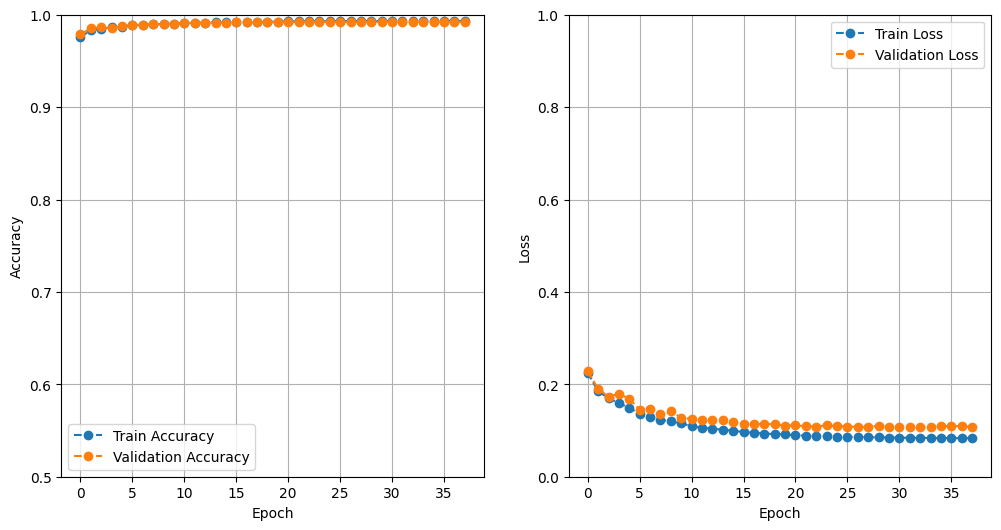

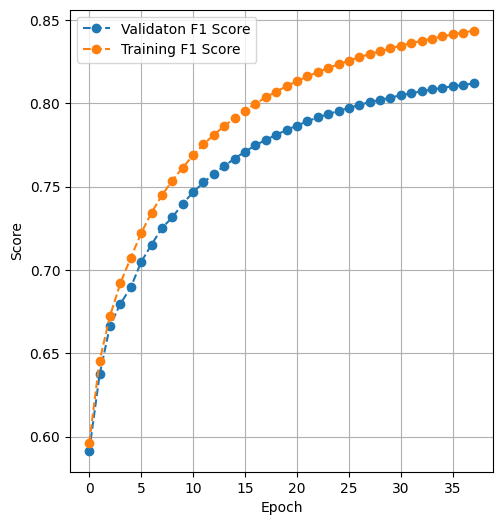

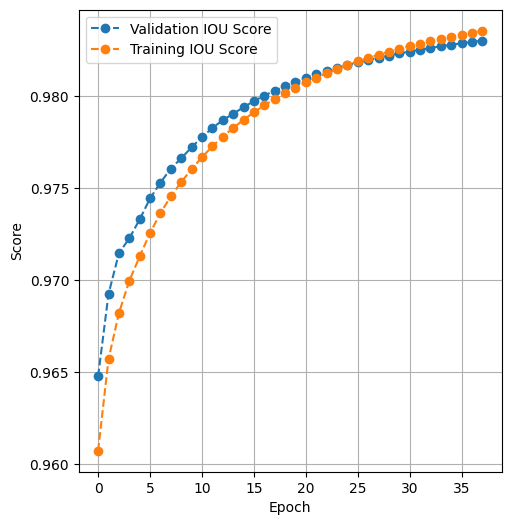

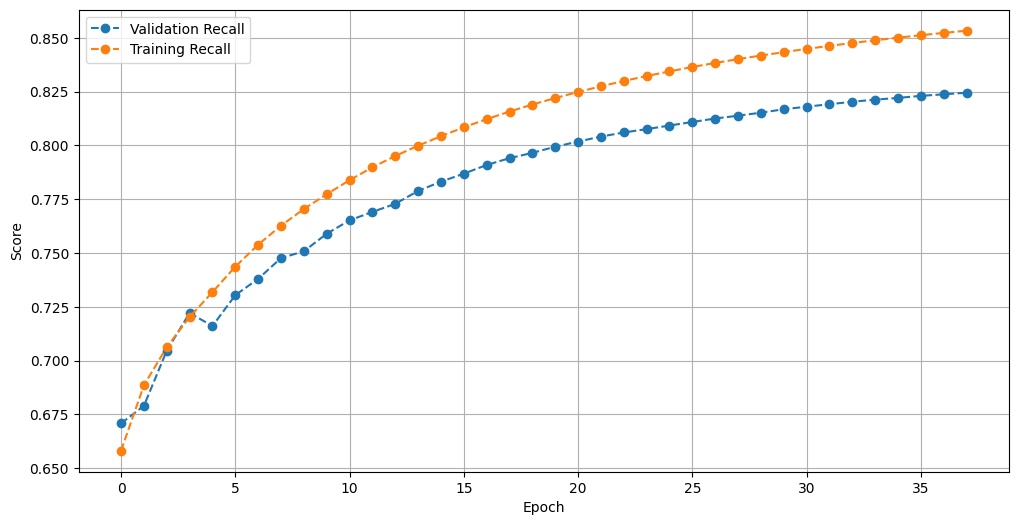

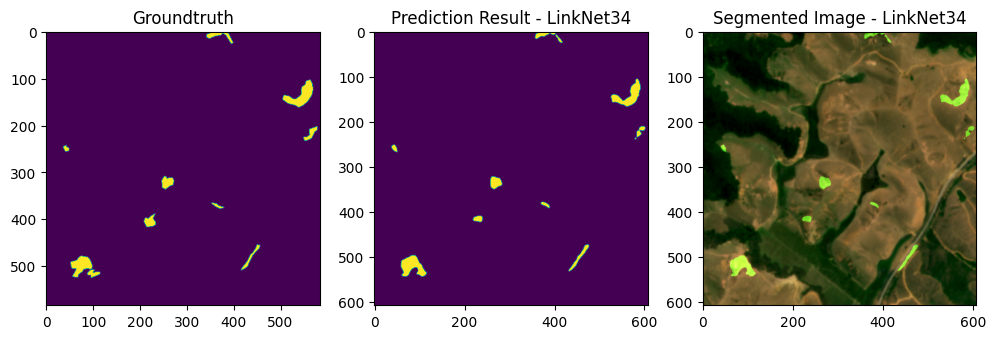

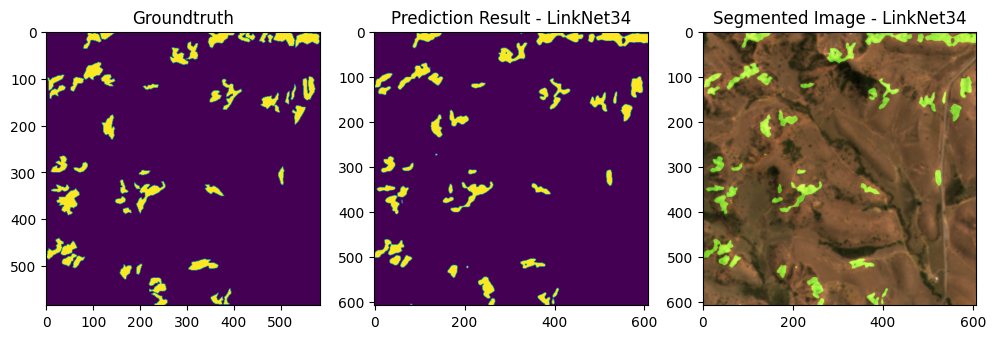

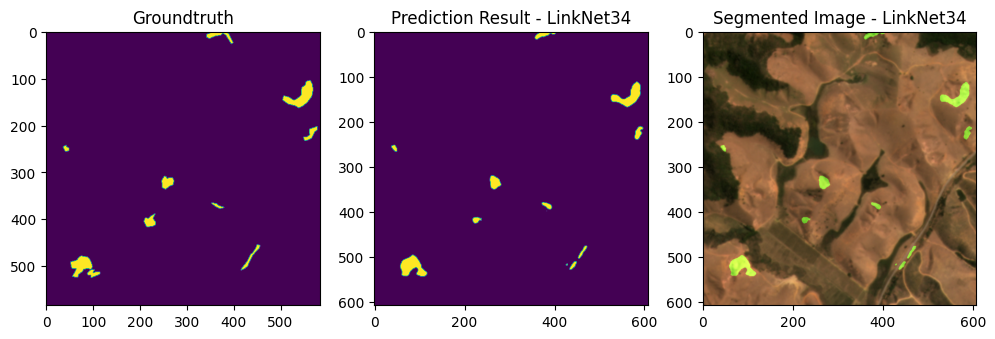

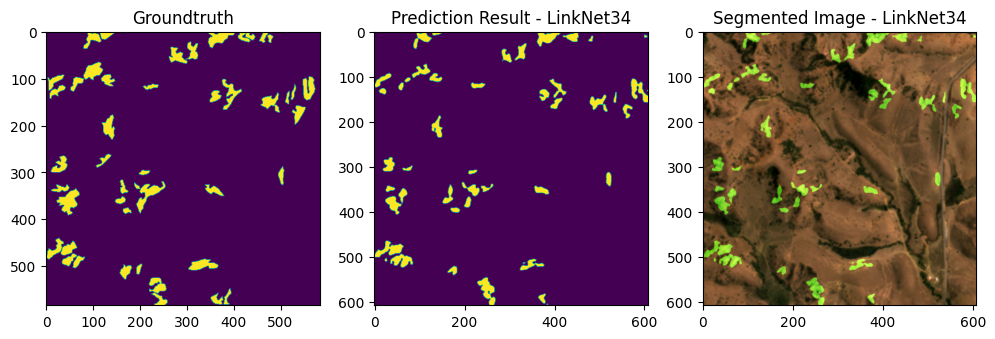

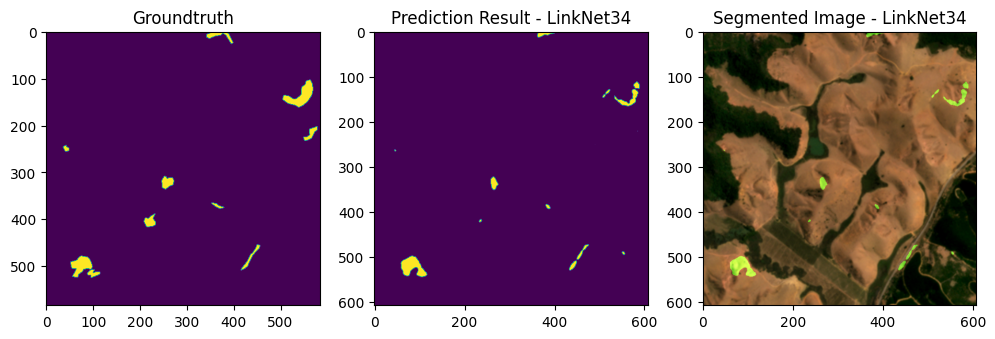

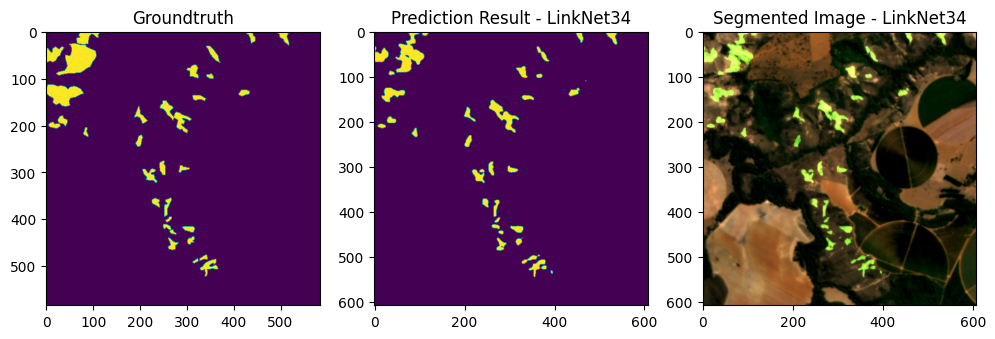

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)